[*********************100%***********************]  31 of 31 completed


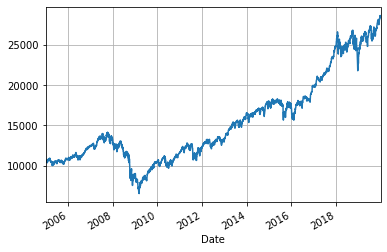

In [36]:
# Download Data from Yahoo Finance
import datetime
import matplotlib.pyplot as plt
import pandas as pd
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 
import numpy as np
start_sp = datetime.datetime(2004,12,31)
end_sp = datetime.datetime(2019, 12,31)

# Dow Jones index
# 1st Dow Jones Index + 30 components
dow30 = ['^DJI','AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'XOM',
         'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
         'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG',
         'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']

Dow_data = yf.download(dow30, start=start_sp, end=end_sp,group_by="ticker")

# To access the adjusted close price, use
Dow_data['^DJI']['Close']

# Graph data
Dow_data['^DJI']['Close'].plot(grid=True)

In [4]:
#Question 1
#a)
#print(Dow_data)

In [37]:
stocks=np.array(Dow_data)

In [39]:
i=0
j=4
k=0
rendement=np.zeros((len(stocks)-1,31))
moyenne=np.zeros((1,31))
ecarttype=np.zeros((1,31))
while i<len(stocks)-1:
    while j<len(stocks[0])-1:
        rendement[i,k]=(-stocks[i,j]+stocks[i+1,j])/stocks[i,j]
        j=j+6
        k=k+1
    i=i+1
    k=0
    j=4
rendement=np.nan_to_num(rendement, copy=True, nan=0.0, posinf=None, neginf=None)
print(periodique)

[-0.00588665 -0.0092371  -0.00270762 ...  0.00095789 -0.00704954
  0.0040522 ]


In [45]:
#Taux Periodique annuel
tauxAnnee=np.zeros((15,31))
i=0
for i in range(15):
    tauxAnnee[i,:]=rendement[262*i:262*(i+1),:].sum(axis=0)
#Ecart Type
ecartType=np.std(tauxAnnee,axis=0)
moyenne=np.mean(tauxAnnee,axis=0)

#Matrice Covariance
mat=np.cov(tauxAnnee)
#print(mat)
#print(moyenne)
#print(ecartType)

In [47]:
#Matrice de corrélation
matopti=np.corrcoef(tauxAnnee)
#print(matopti)

In [57]:
from scipy.optimize import minimize
x0=np.zeros((1,len(mat[0])))
x0[:,:]=1/31
minimize(mat, x0, args=(), method="Nelder-Mead" , jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)[source]


[[0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
  0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
  0.03225806 0.03225806 0.03225806]]


TypeError: 'numpy.ndarray' object is not callable

In [58]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

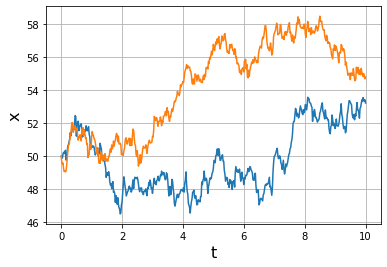

In [69]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel
# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 2
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50


brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

In [66]:
from scipy.special import ndtri
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time
import math
import os
simple_optimise_return(10,portfolio=True,Print=True)
optimise_risk_return(10,portfolio=True,Print=True)

NameError: name 'simple_optimise_return' is not defined

In [ ]:
# This simple script gathers data of stocks and uses it to simulate future price for
# 1 year (255 days). Then it optimises the portfolio for risk and returns using risk
# measures such as VaR
#
# Note: tickers are all lower case, such as "aapl"
from scipy.special import ndtri
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time
import math
import os
# Set chdir where the tickers lie
os.chdir(mypath)
# Get tickers as a list
stocks = os.listdir()
# Get data on stocks
file = open(mystockData,"r")
data = file.read()
file.close()
lines = data.split("\n")
# A dictionary containing raw data as a string for each stock
stocks_dictionary = dict()
# Previons for 255 days for each stock
prevision = dict()
# Correlation data
tickersCorr = [] # tickers
returnsCorr = [] # for correlation matrix
# Standard deviation dictionary
stdv = dict()
# Stocks average returns
meanReturns = dict()
# Stocks mu/stdv ratio
muStdvRatio = dict()
# Store data in dictionaries and run prevision of future prices
def runSimulation(ticker):
mu = float(stocks_dictionary[ticker][0])
sd = float(stocks_dictionary[ticker][1])
try:
# Storing initial price
initialp = float(stocks_dictionary[ticker][2])
# Calculating and storing standard deviation
returnsData = np.array([float(i) for i in stocks_dictionary[ticker][3
sd = returnsData.std()
stdv[ticker] = sd
# Storing average returns
meanReturns[ticker] = mu
# Storing mu/stdv ratio
muStdvRatio[ticker] = mu/sd
except Exception as e:
# In case initial price is not available, 100 is fixed as default
initialp = 100
print(initialp,ticker.upper(),"Exception: ",e)
try:
# Calculate correlation only for stocks with datapoints > 509 days
if (len(stocks_dictionary[ticker])‐2) >= 509:
tickersCorr.append(ticker)
returnsCorr.append(stocks_dictionary[ticker][3:505])
else:
pass
except Exception as e:
print("Exception triggered: ",e)
# Run stock simulation for a year (255 days)
prevision_price = []
for t in range(255):
try:
n = np.random.normal(0,1,1)
r = mu + n*sd
price = initialp * math.pow(math.e,r)
prevision_price.append(price)
initialp = price
except Exception as e:
print("Exception triggered__2",e)
prevision[ticker] = np.array(prevision_price)
def fillDicts():
global tickersCorr, returnsCorr
                          # Fill dictionaries with values
for line in lines[1:]:
try:
lines_data = line.split(",")
stocks_dictionary[lines_data[0]] = lines_data[1:]
except Exception as e:
print("Exception triggered",e)
# Run simulation for each stock
for stock in stocks_dictionary.keys():
try:
runSimulation(stock)
except Exception as e:
print("Exception triggered",e)
# Convert returnsCorr into a numpy array
returnsCorr = np.array(returnsCorr)
# This function builds a correlation matrix and if plott = True plots the heat‐map
def correlationMatrix(plott = False):
cmatrix = np.corrcoef(returnsCorr)
if plott:
plt.imshow(cmatrix,interpolation='nearest')
plt.colorbar()
plt.show()
return cmatrix
else:
return cmatrix
# This function plots price prediction for the last 20 stocks in the sample
def plotStocks(index=1,ticker=0,single=False):
plt.style.use("ggplot")
if single:
ticker = ticker.lower()
returns = [float(i) for i in stocks_dictionary[ticker][3:‐1]]
prev = prevision[ticker]
plt.plot(returns,label=ticker)
plt.plot(prev,label=ticker)
else:
for i in stocks[‐index:]:
try:
plt.plot(prevision[i],label=i)
except:
pass
plt.xlim([0,255])
if index < 8 or single:
plt.legend()
plt.title("Stock price simulation")
plt.show()
# This function builds the variance covariance matrix given a set of tickers (stocks)
def varCovarMatrix(stocksInPortfolio):
cm = correlationMatrix()
vcv = []
for eachStock in stocksInPortfolio:
row = []
for ticker in stocksInPortfolio:
if eachStock == ticker:
variance = math.pow(stdv[ticker],2)
row.append(variance)
else:
cov = stdv[ticker]*stdv[eachStock]* cm[tickersCorr.index(ticker)][tickersCorr.index(eachStock)]
row.append(cov)
vcv.append(row)                                          